## Preface 

- Revisiting some of the core topics of classification covered here: https://github.com/mmmayo13/scikit-learn-classifiers/blob/master/sklearn-classifiers-tutorial.ipynb

- sci-kit learn used where possible


### K Fold Cross Validation

- divide a dataset into multiple subsets to iteratively train and test the model
- splits a dataset into N parts - which each part serving as a test set during one of the N iterations
- By using multiple training and testing cycles, it minimizes the risk of overfitting to a particular data split
- results in a more comprehensive evaluaton of the model's performance

### Explore datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

C:\Users\jorda\AppData\Local\Temp\ipykernel_25468\642192546.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
iris = datasets.load_iris()
digits = datasets.load_digits()

In [3]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['class'] = iris.target

# Output head of iris dataframe for instance inspection
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
print(matplotlib.__version__)
import IPython
print(IPython.__version__)

3.10.8
8.38.0


<Axes: ylabel='Density'>

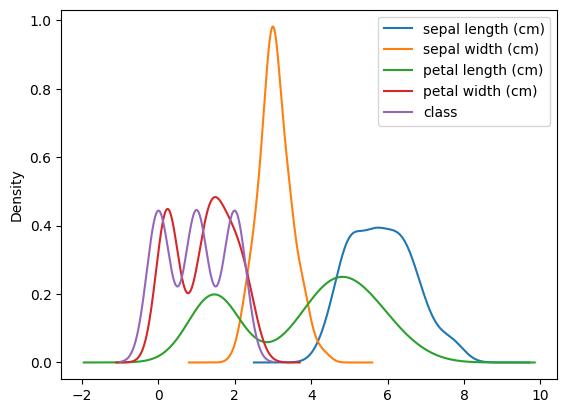

In [6]:
iris_df.plot(kind='kde')

In [7]:
# Load digits dataset into a dataframe for exploration
digits_df = pd.DataFrame(digits.data)
digits_df['class'] = digits.target

# Output head of iris dataframe for instance inspection
digits_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,class
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


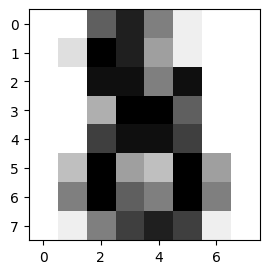

In [8]:
# Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### data preparation

- random state set - ensures the splits are reproducible
- stratify ensures that the class distributions match the original dataset
- confusion matrix -

| Metric | Formula | Intuition |
|--------|---------|-----------|
| Accuracy | (TP + TN) / total | Overall correctness |
| Precision | TP / (TP + FP) | "When I predict positive, how often am I right?" |
| Recall (Sensitivity) | TP / (TP + FN) | "Of all actual positives, how many did I catch?" |
| Specificity | TN / (TN + FP) | "Of all actual negatives, how many did I correctly reject?" |
| F1 Score | 2 × (Precision × Recall) / (Precision + Recall) | Harmonic mean balancing precision and recall |

In [9]:
X = iris.data
y = iris.target
    
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_dig = digits.data
y_dig = digits.target
    
X_dig_train, X_dig_test, y_dig_train, y_dig_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

# Create and format a confusion matrix
def conf_matrix(y_test, y_predict):

    # Create the raw confusion matrix
    conf = sk_confusion_matrix(y_test, y_predict)

    # Format the confusion matrix nicely
    conf = pd.DataFrame(data=conf)
    conf.columns.name = 'Predicted label'
    conf.index.name = 'Actual label'

    # Return the confusion matrix
    return conf

### Logistic Regression

- Used when predicting binary classes - only two possible outcomes
- Uses a sigmoid function for a continuous output - for instance an outcome above 50% gives a yes classification
- Predicts Probabilities, Not Classes: Unlike classification algorithms that directly output a category (e.g., "Yes" or "No"), logistic regression predicts a continuous probability score between 0 and 1 (e.g., 0.85 chance of "Yes").

In [11]:
# Import logistic regression library
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model object
logistic = LogisticRegression()

# Train the model
logistic.fit(X_train, y_train)

# Check the score
logistic.score(X_train, y_train)

0.975

In [12]:
print('Logistic Model Coefficient: ', logistic.coef_)
print('Logistic Model Intercept: ', logistic.intercept_)

Logistic Model Coefficient:  [[-5.29548491e-01  8.27268547e-01 -2.34736846e+00 -9.93395947e-01]
 [ 5.29710579e-01 -3.04728088e-01 -1.70954084e-01 -8.56071423e-01]
 [-1.62088282e-04 -5.22540459e-01  2.51832255e+00  1.84946737e+00]]
Logistic Model Intercept:  [ 10.12551682   1.797601   -11.92311782]


In [13]:
y_predict = logistic.predict(X_test)

In [14]:
conf = conf_matrix(y_test, y_predict)

# Output the confusion matrix
conf

Predicted label,0,1,2
Actual label,,,
0,10,0,0
1,0,9,1
2,0,0,10


In [15]:
err_rate = (y_predict != y_test).mean()
print('Logistic Model Error Rate: %.2f' % err_rate)

Logistic Model Error Rate: 0.03


In [16]:
 # Create the logistic regression model object
logistic_dig = LogisticRegression()

# Train the model
logistic_dig.fit(X_dig_train, y_dig_train)

# Check the score
logistic_dig.score(X_dig_train, y_dig_train)

0.975

In [17]:
y_dig_predict = logistic_dig.predict(X_dig_test)
y_dig_predict

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 2, 1, 0, 2, 0])

In [18]:
conf_dig = conf_matrix(y_dig_test, y_dig_predict)

# Output the confusion matrix
conf_dig

Predicted label,0,1,2
Actual label,,,
0,10,0,0
1,0,9,1
2,0,0,10


### SVM

- Supervised machine learning algo
- determines best boundary - known as a hyperplane for separating different classes of data
- Hyperplane: A decision boundary separating different classes in feature space and is represented by the equation wx + b = 0 in linear classification.
- Support Vectors: The closest data points to the hyperplane, crucial for determining the hyperplane and margin in SVM.
- Margin: The distance between the hyperplane and the support vectors. SVM aims to maximize this margin for better classification performance.
- Kernel: A function that maps data to a higher-dimensional space enabling SVM to handle non-linearly separable data.
- Hard Margin: A maximum-margin hyperplane that perfectly separates the data without misclassifications.
- Soft Margin: Allows some misclassifications by introducing slack variables, balancing margin maximization and misclassification penalties when data is not perfectly separable.
- C: A regularization term balancing margin maximization and misclassification penalties. A higher C value forces stricter penalty for misclassifications.
- Hinge Loss: A loss function penalizing misclassified points or margin violations and is combined with regularization in SVM.
- Dual Problem: Involves solving for Lagrange multipliers associated with support vectors, facilitating the kernel trick and efficient computation.

Works via:
- find the margin which separates two classes by maximising the margin between them
- If two classes cannot be separated linearly, a kernel maps data points to a higher dimension 

In [19]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import svm